In [10]:
from math import sqrt
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

df = pd.read_csv("Cust_Churn_Telco_New.csv")

In [11]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


<AxesSubplot:>

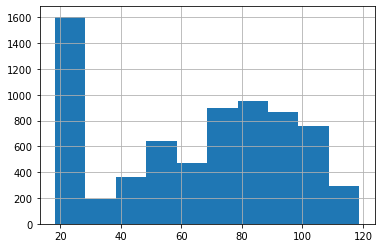

In [13]:
df["MonthlyCharges"].hist()

<AxesSubplot:>

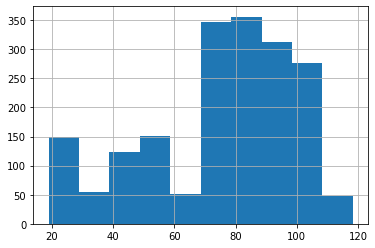

In [14]:
churn_sample = df[df.Churn == "Yes"].MonthlyCharges

churn_sample.hist()

#### $H_{O}$: mean monthly charges of churned customers <= Mean of monthly charges of all customers
#### $H_{a}$: mean monthly charges of churned customers > Mean of monthly charges of all customers

In [18]:
alpha = .05

In [19]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [55]:
churn_sample = df[df.Churn == "Yes"].MonthlyCharges
overall_mean = df.MonthlyCharges.mean()

t, p = stats.ttest_1samp(churn_sample,overall_mean)

print(t,p,p/2, alpha)

16.965403080505645 3.7406392993841064e-60 1.8703196496920532e-60 0.05


In [26]:
p/2 < alpha

True

In [27]:
t > 0

True

In [21]:
churn_sample.head()

2      53.85
4      70.70
5      99.65
8     104.80
13    103.70
Name: MonthlyCharges, dtype: float64

In [23]:
overall_mean

64.76169246059922

In [30]:
if p/2 > alpha:
    print("we fail to reject the $H_{O}$")
elif t < 0:
    print("we fail to reject the $H_{O}$")
else:
    print("we reject the $H_{O}$, Mean of monthly charges of churned customers significantly more than charges across the board")

we reject the $H_{O}$, Mean of monthly charges of churned customers significantly more than charges across the board


#### $H_{O}$: mean monthly charges of churned customers == Mean of monthly charges of all customers
#### $H_{a}$: mean monthly charges of churned customers != Mean of monthly charges of all customers

In [31]:
t,p = stats.ttest_1samp(churn_sample, overall_mean)

In [32]:
t,p

(16.965403080505645, 3.7406392993841064e-60)

In [33]:
p < alpha

True

Mean monthly charges of churned customers is significantly different than the overall customers

#### $H_{O}$: mean monthly charges of churned customers >= Mean of monthly charges of all customers
#### $H_{a}$: mean monthly charges of churned customers < Mean of monthly charges of all customers

In [34]:
t,p = stats.ttest_1samp(churn_sample, overall_mean)

In [35]:
t,p

(16.965403080505645, 3.7406392993841064e-60)

In [36]:
print(t < 0)
print(p/2 < alpha)

False
True


In [38]:
if p/2 > alpha:
    print("we fail to reject the $H_{O}$")
elif t > 0:
    print("we fail to reject the $H_{O}$")
else:
    print("we reject the $H_{O}$, Mean of monthly charges of churned customers significantly more than charges across the board")

we fail to reject the $H_{O}$


I believe that customers that churn are charged more (monthly avg) than customers who dont churn. Is the mean of the monthly charges of customers who churn significantly higher than the mean of those who dont churn

We will use a 1-tailed("significantly higher"), 2-sample (comparing 2 independent groups)

<AxesSubplot:>

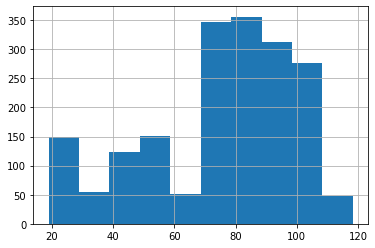

In [39]:
churn_sample.hist()

In [45]:
no_churn_sample = df[df.Churn == "No"].MonthlyCharges

<AxesSubplot:>

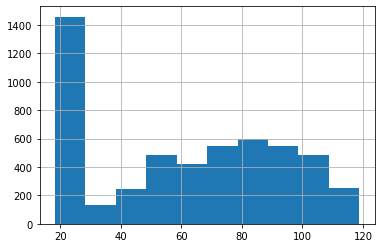

In [41]:
no_churn_sample.hist()

#### $H_{O}$: mean monthly charges of churned customers <=  mean of customers that didnt churn
#### $H_{a}$: mean monthly charges of churned customers > mean of customers that didnt churn

In [42]:
alpha = .05

In [46]:
print(churn_sample.var())
print(no_churn_sample.var())

608.4141833954304
966.7527670734287


In [47]:
t, p = stats.ttest_ind(churn_sample, no_churn_sample,equal_var = False)
t, p/2

(18.407526676414673, 4.2962246657737696e-73)

In [50]:
print("is p/2 < alpha?:", p/2 < alpha)
print("is t > 0?:", t > 0)

is p/2 < alpha?: True
is t > 0?: True


Are customers who churn significantly different than those who dont churn

#### $H_{O}$: mean monthly charges of churned customers == Mean of customers who dont churn
#### $H_{a}$: mean monthly charges of churned customers != Mean of customers who dont churn

In [51]:
t, p = stats.ttest_ind(churn_sample,no_churn_sample,equal_var = False)
t, p

(18.407526676414673, 8.592449331547539e-73)

In [52]:
print("Reject Ho:", p < alpha)

Reject Ho: True


Are charges of customers who churn significantly less than those who do not churn?

#### $H_{O}$: mean monthly charges of churned customers >= Mean of customers who dont churn
#### $H_{a}$: mean monthly charges of churned customers < Mean of customers who dont churn

In [54]:
print("is t < 0", t < 0)
print("is p/2 < alpha", p/2 < alpha)

is t < 0 False
is p/2 < alpha True


# ANOVA Analysis of Variance

In [56]:
df = sns.load_dataset("iris")

In [57]:
df.sepal_length.describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

In [58]:
varsicolor_sepal_length = df[df.species == "versicolor"].sepal_length
virginica_sepal_length = df[df.species == "virginica"].sepal_length
setosa_sepal_length = df[df.species == "setosa"].sepal_length

In [59]:
alpha = .05

In [60]:
print(varsicolor_sepal_length.var())
print(virginica_sepal_length.var())
print(setosa_sepal_length.var())

0.2664326530612246
0.40434285714285706
0.12424897959183666


In [61]:
f, p = stats.f_oneway(varsicolor_sepal_length, virginica_sepal_length,setosa_sepal_length)
f, p

(119.26450218450472, 1.6696691907693648e-31)

We reject the $h_{O}$

In [62]:
df = sns.load_dataset("mpg")

In [64]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
